# Image Processing 101

We're going to learn about modeling and applications of using text data from a hands-on approach.

For those looking for a more comprehensive dive, I recommend 

 - Stanford Chris Manning's Course with video lectures and homeworks: http://web.stanford.edu/class/cs224n/
 - K. Cho's curriculum from NYU which has more written lectures and homeworks but not videos: https://github.com/nyu-mll/DS-GA-1011-Fall2017

I will be pulling a lot of content from both sources (and re-going through the cs224n homework with all of you because I haven't done the homework in a while) but removing a lot of the discussion about linguistic theory to keep this short-ish.

Just to be honest, contrary to my experience in Images and Recommendation engines where I consider myself an expert, having built many industry models and taught at Columbia and MIT, I have less experience in NLP and the field is quickly evolving. So I've built some modern models, but sometimes I forget my fundamentals like how CBOW is trained, and I've gotten models to work by debugging sequence lengths for gradient descent stability, but I haven't gotten to the point that I have a reliable set of recommendations to solve every problem like with convolutions on images.

So we're gonna learn all this together, and I'll try to make sure you guys come out of this with an understanding of NLP, ability to design and develop language applications, and expertise in PyTorch.

## So what are we learning and why does language need a special set of tools?


### Chris Manning starts by explaining this comic, so I'll do the same
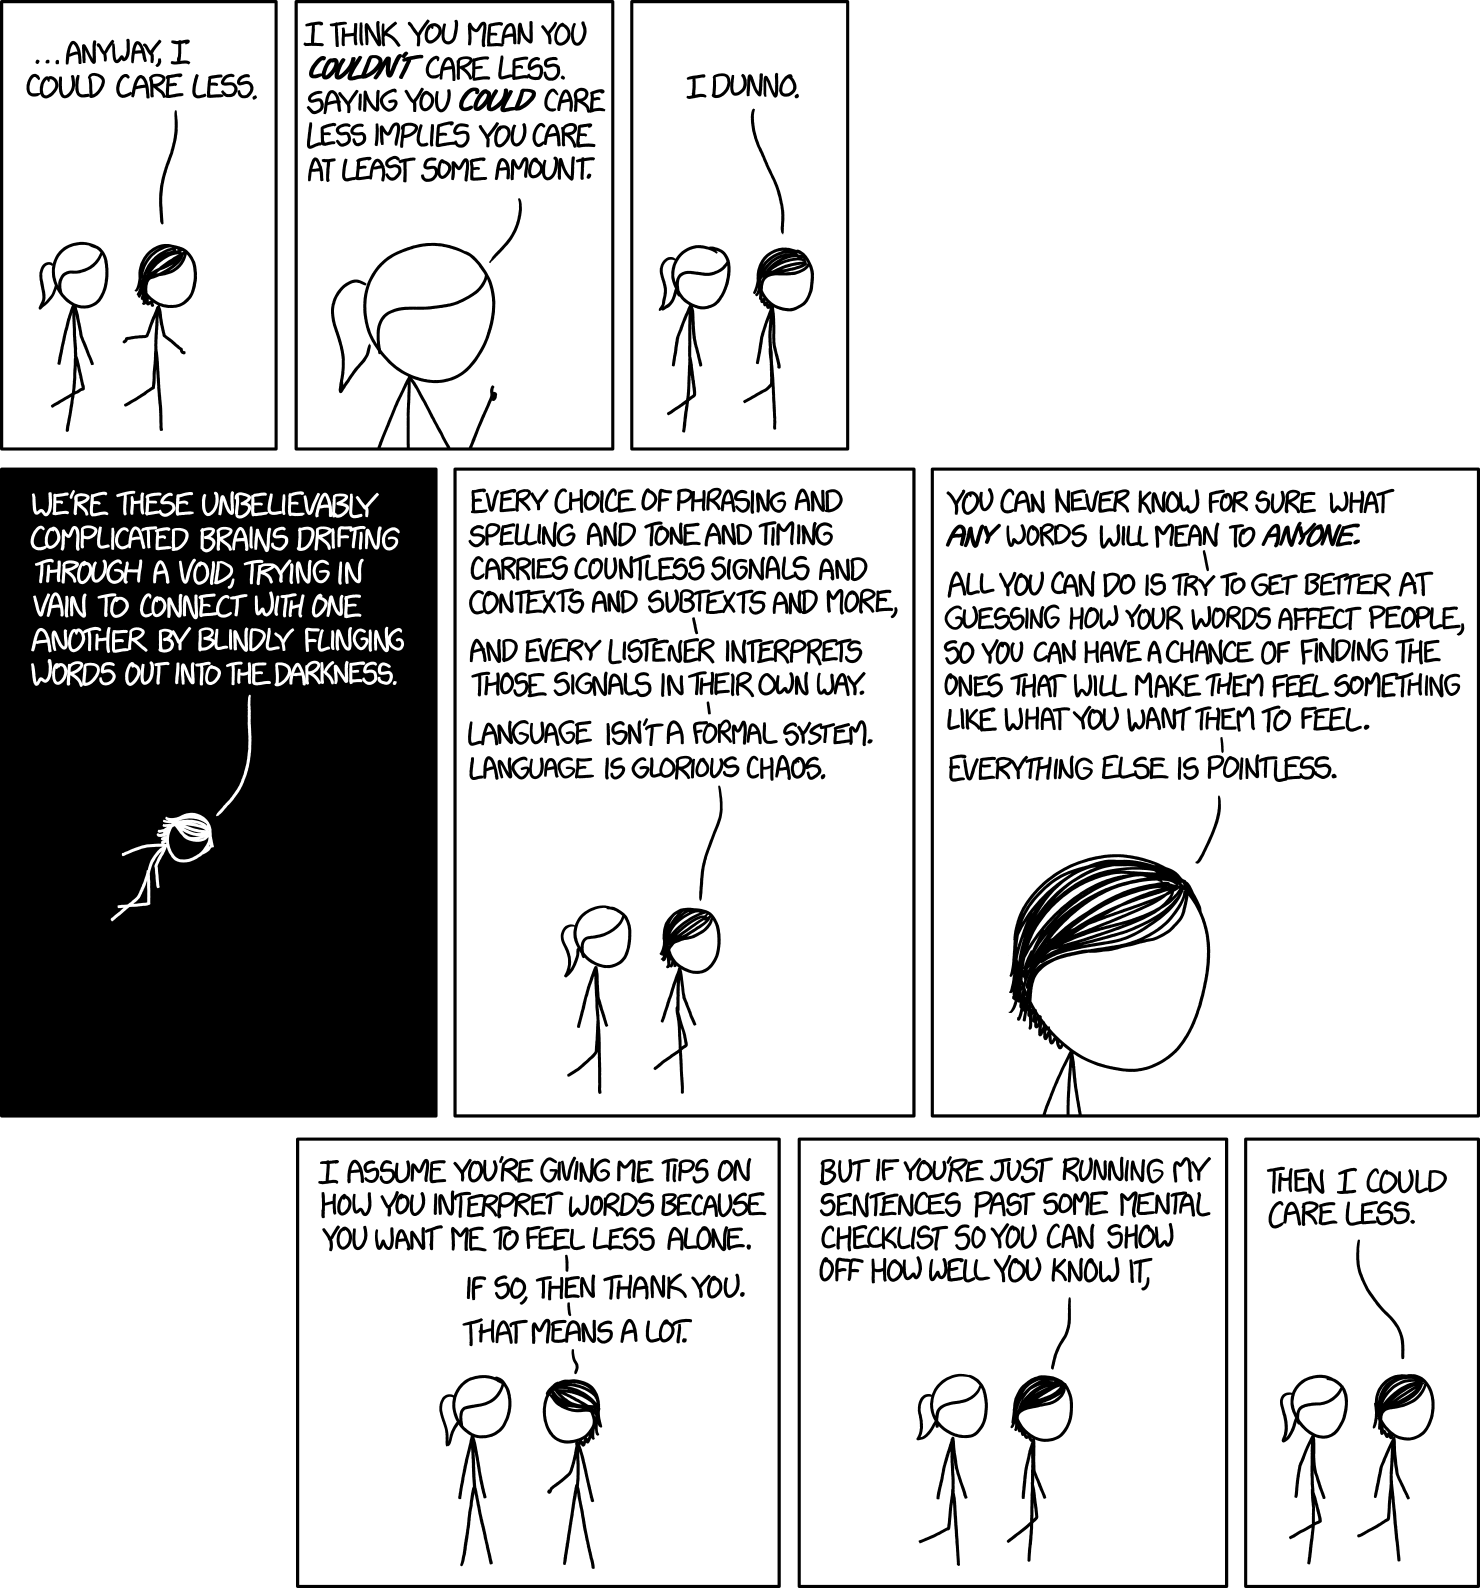

### I also liked this comic, just reiterating the same point
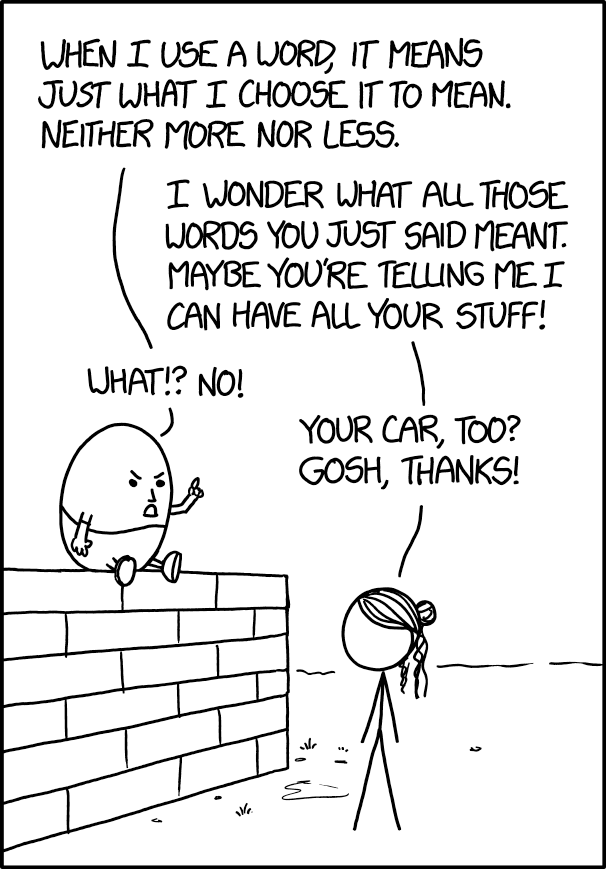

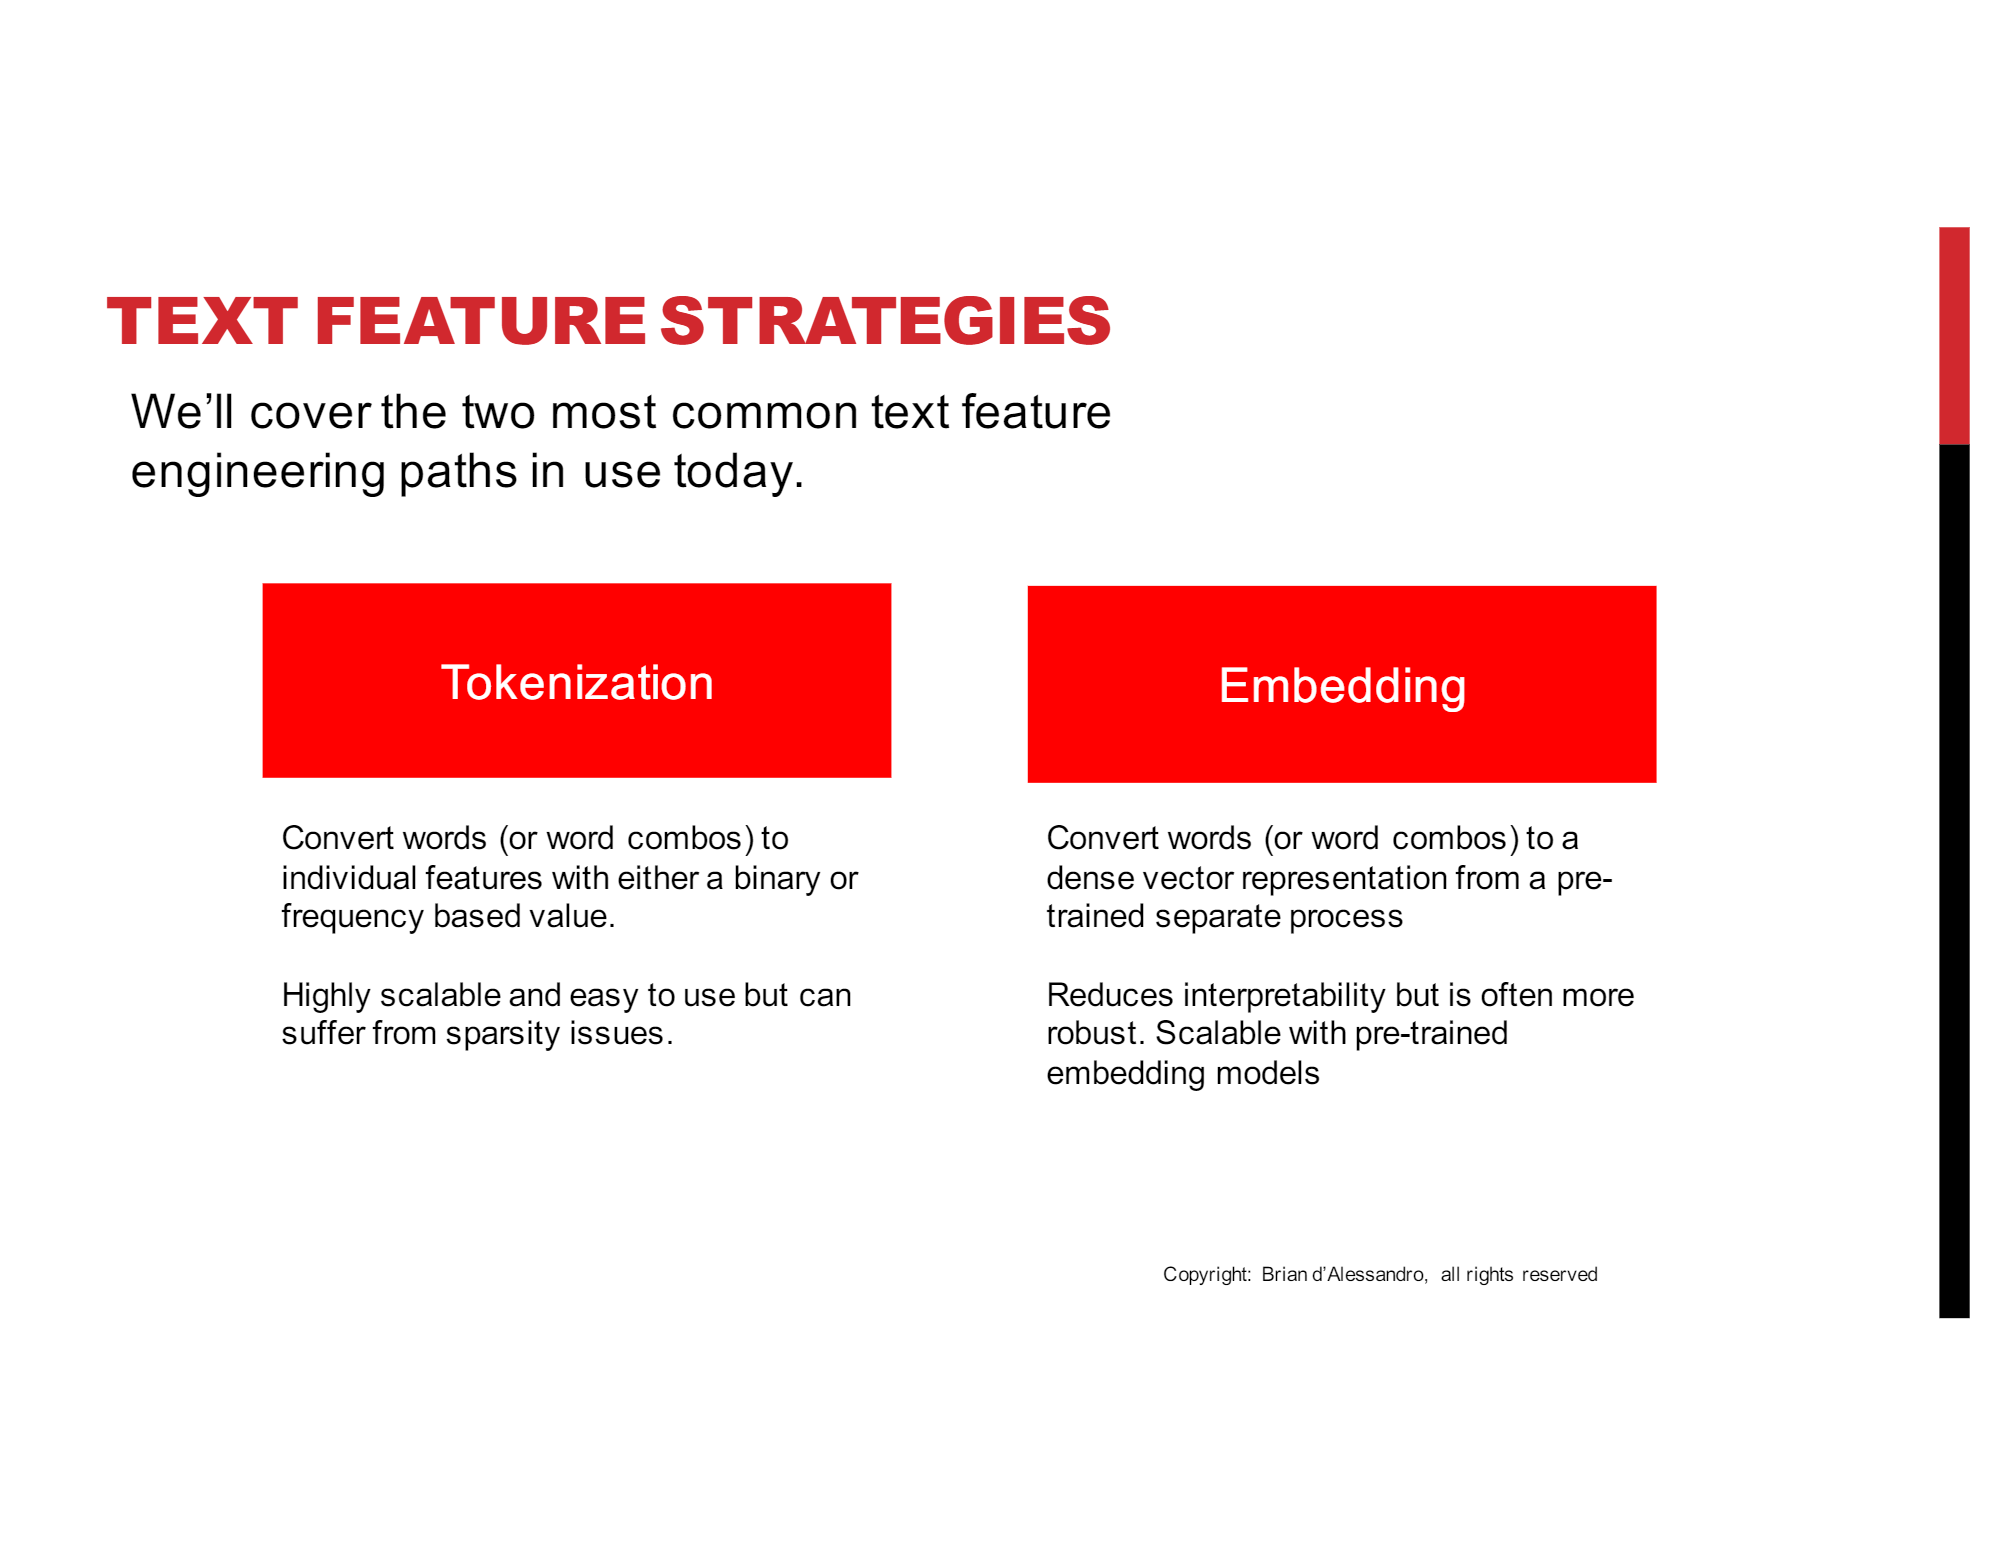

## Let's Look at some Text

In [2]:
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

In [3]:
from sklearn.datasets import fetch_20newsgroups
twenty_train = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)

In [5]:
twenty_train['data']

['From: sd345@city.ac.uk (Michael Collier)\nSubject: Converting images to HP LaserJet III?\nNntp-Posting-Host: hampton\nOrganization: The City University\nLines: 14\n\nDoes anyone know of a good way (standard PC application/PD utility) to\nconvert tif/img/tga files into LaserJet III format.  We would also like to\ndo the same, converting to HPGL (HP plotter) files.\n\nPlease email any response.\n\nIs this the correct group?\n\nThanks in advance.  Michael.\n-- \nMichael Collier (Programmer)                 The Computer Unit,\nEmail: M.P.Collier@uk.ac.city                The City University,\nTel: 071 477-8000 x3769                      London,\nFax: 071 477-8565                            EC1V 0HB.\n',
 "From: ani@ms.uky.edu (Aniruddha B. Deglurkar)\nSubject: help: Splitting a trimming region along a mesh \nOrganization: University Of Kentucky, Dept. of Math Sciences\nLines: 28\n\n\n\n\tHi,\n\n\tI have a problem, I hope some of the 'gurus' can help me solve.\n\n\tBackground of the probl

In [6]:
print("\n".join(twenty_train.data[0].split("\n")[:3]))

From: sd345@city.ac.uk (Michael Collier)
Subject: Converting images to HP LaserJet III?
Nntp-Posting-Host: hampton


## Bag of Words


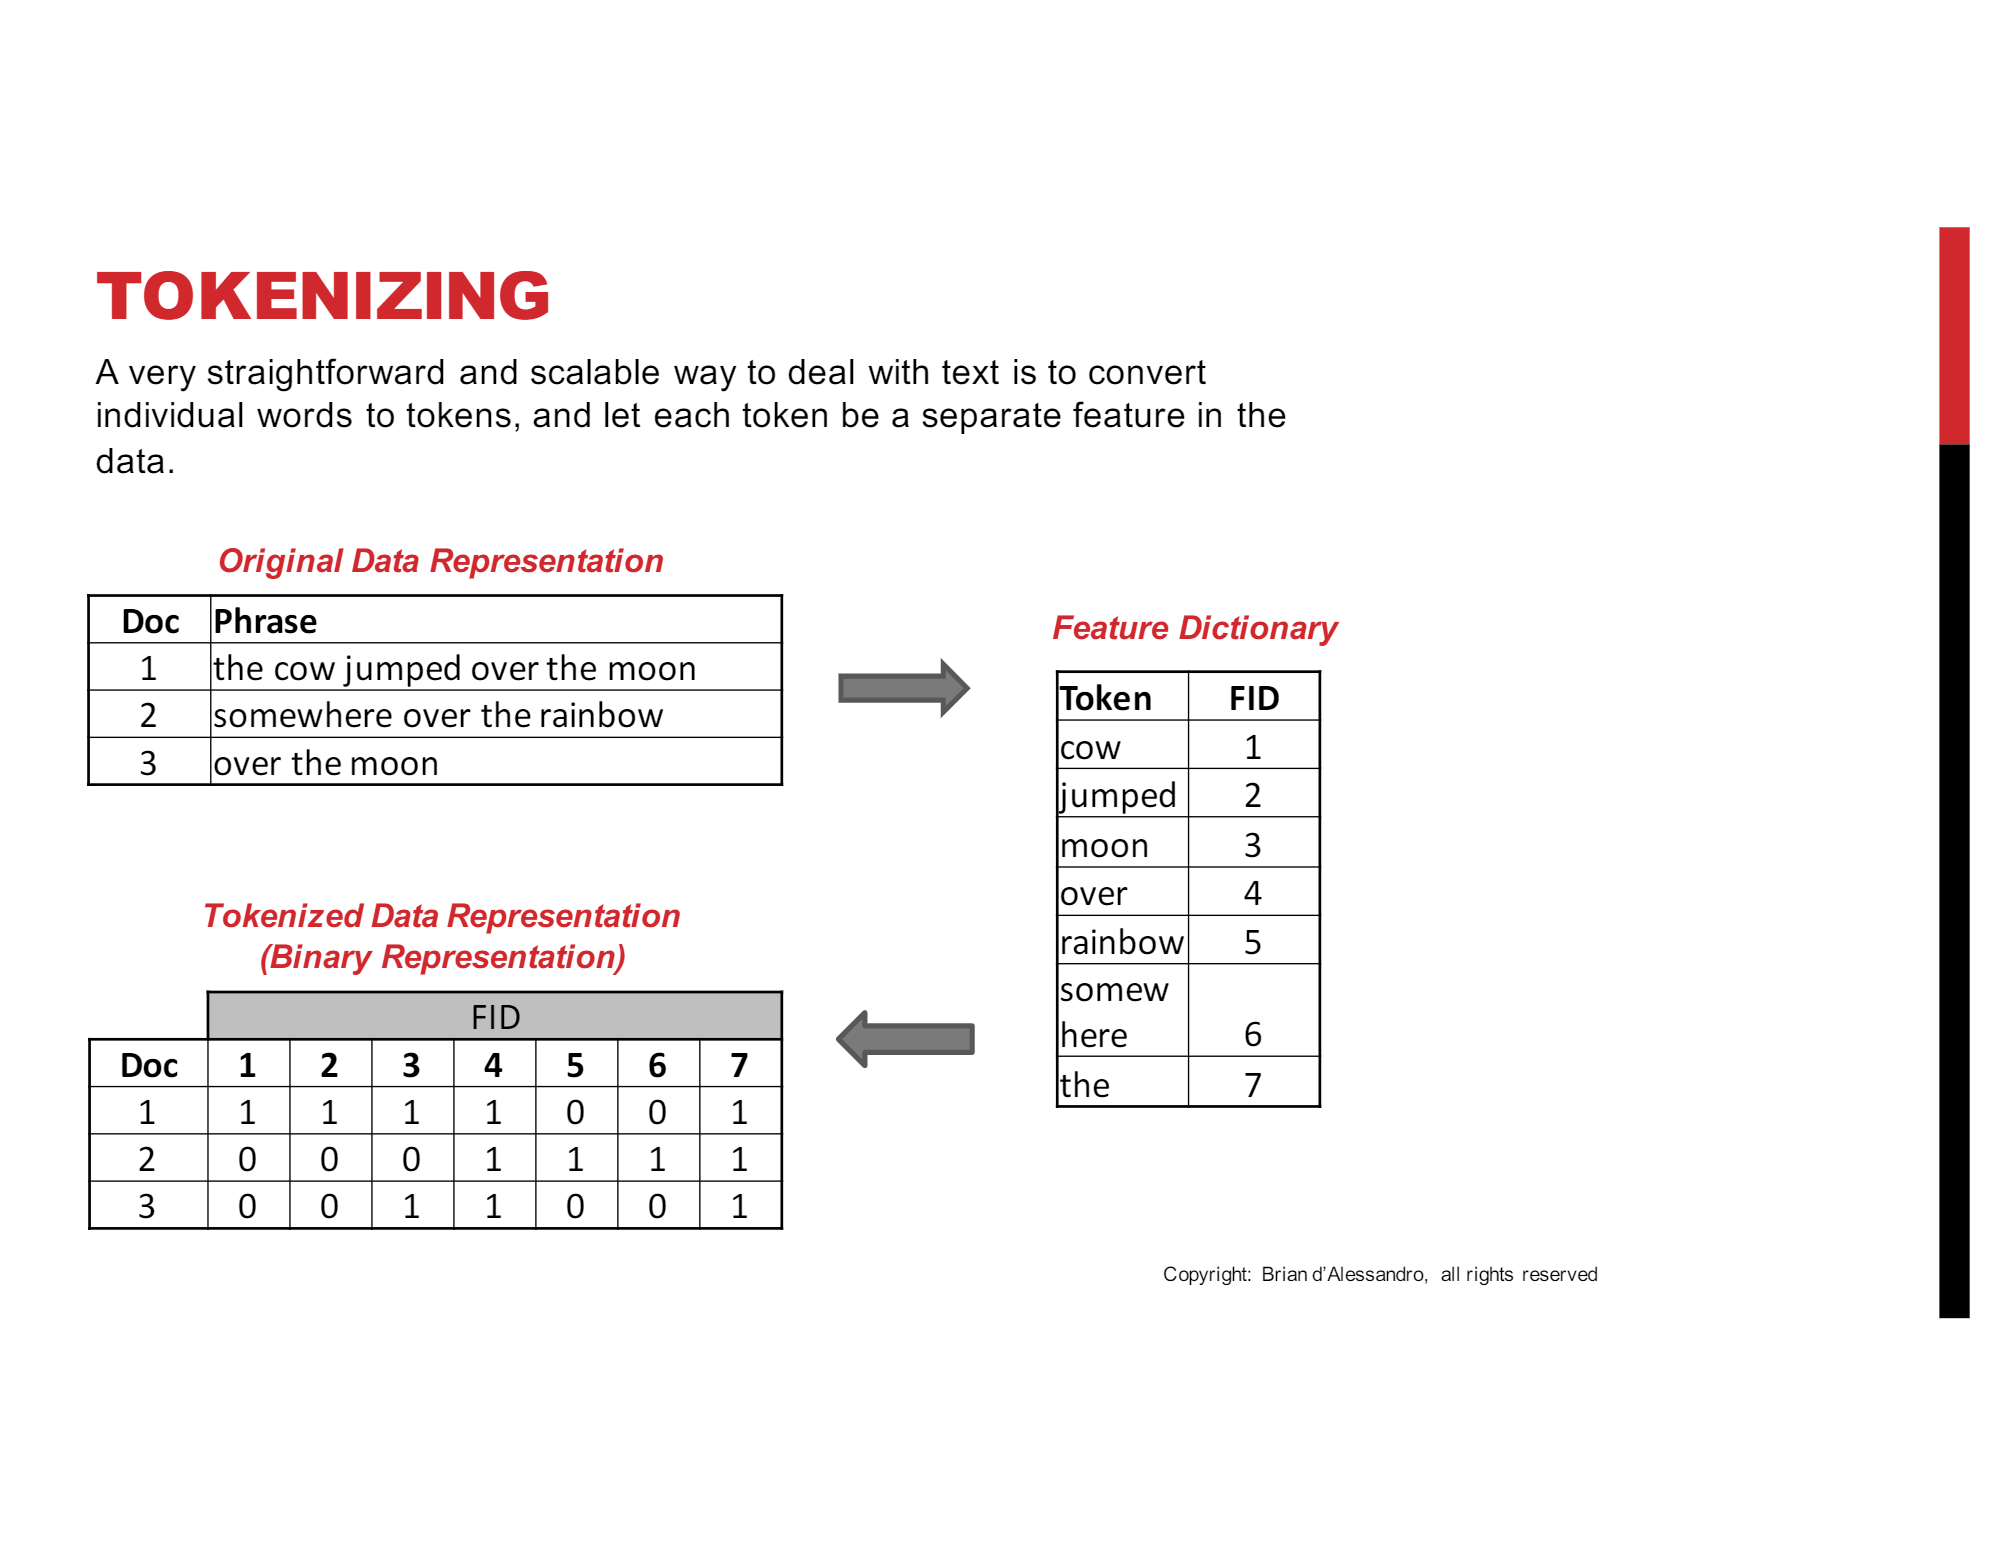

In [8]:
# Lets look at the problem of classification of what type of text is in each email
for t in twenty_train.target[:10]:
     print(twenty_train.target_names[t])

comp.graphics
comp.graphics
soc.religion.christian
soc.religion.christian
soc.religion.christian
soc.religion.christian
soc.religion.christian
sci.med
sci.med
sci.med


In [9]:
twenty_train.target[:10]

array([1, 1, 3, 3, 3, 3, 3, 2, 2, 2], dtype=int64)

In [10]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(twenty_train.data)
X_train_counts.shape

(2257, 35788)

In [33]:
count_vect.vocabulary

In [11]:
X_train_counts

<2257x35788 sparse matrix of type '<class 'numpy.int64'>'
	with 365886 stored elements in Compressed Sparse Row format>

In [12]:
count_vect.vocabulary_.get(u'algorithm')

4690

In [14]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_train_tfidf.shape

(2257, 35788)

In [15]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(X_train_tfidf, twenty_train.target)

In [16]:
docs_new = ['God is love', 'OpenGL on the GPU is fast']
X_new_counts = count_vect.transform(docs_new)
X_new_tfidf = tfidf_transformer.transform(X_new_counts)
predicted = clf.predict(X_new_tfidf)
for doc, category in zip(docs_new, predicted):
    print('%r => %s' % (doc, twenty_train.target_names[category]))

'God is love' => soc.religion.christian
'OpenGL on the GPU is fast' => comp.graphics


In [36]:
count_vect.vocabulary_

{'from': 14887,
 'sd345': 29022,
 'city': 8696,
 'ac': 4017,
 'uk': 33256,
 'michael': 21661,
 'collier': 9031,
 'subject': 31077,
 'converting': 9805,
 'images': 17366,
 'to': 32493,
 'hp': 16916,
 'laserjet': 19780,
 'iii': 17302,
 'nntp': 23122,
 'posting': 25663,
 'host': 16881,
 'hampton': 16082,
 'organization': 23915,
 'the': 32142,
 'university': 33597,
 'lines': 20253,
 '14': 587,
 'does': 12051,
 'anyone': 5201,
 'know': 19458,
 'of': 23610,
 'good': 15576,
 'way': 34755,
 'standard': 30623,
 'pc': 24651,
 'application': 5285,
 'pd': 24677,
 'utility': 33915,
 'convert': 9801,
 'tif': 32391,
 'img': 17389,
 'tga': 32116,
 'files': 14281,
 'into': 18268,
 'format': 14676,
 'we': 34775,
 'would': 35312,
 'also': 4808,
 'like': 20198,
 'do': 12014,
 'same': 28619,
 'hpgl': 16927,
 'plotter': 25361,
 'please': 25337,
 'email': 12833,
 'any': 5195,
 'response': 27836,
 'is': 18474,
 'this': 32270,
 'correct': 9932,
 'group': 15837,
 'thanks': 32135,
 'in': 17556,
 'advance': 4378,

## those words kind've suck

In [40]:
# throw away your stopwords
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\10838233\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## throw away your SUPER uncommon word (Like words that only appear 1-3 times)
 I'm not gonna show that code here.

## Lemmatize your words

In [46]:
# lemmatize your words
from nltk.stem import WordNetLemmatizer
nltk.download('omw-1.4')
lemmatizer = WordNetLemmatizer()
  
print("rocks :", lemmatizer.lemmatize("rocks"))
print("corpora :", lemmatizer.lemmatize("corpora"))
  
# a denotes adjective in "pos"
print("better :", lemmatizer.lemmatize("better", pos ="a"))

rocks : rock
corpora : corpus
better : good


[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\10838233\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


# Intrinsic vs Extrinsic Evaluation
How do you evaluate if your NLP is good? Do you compute how well you do at a task like learning a language representation> This is good (intrinsic) because it's fast. Or do you evaluate how well your new repreesntations can be used to improve building chatbots or other dwonstream tasks? Those are more important, but slower to calculate performance on.

# Next Steps: PyTorch Tutorial, NLP Homework 1